# Объем гипершара

### Условие задачи

**Дано:**
- гипершар радиуса $1$ в пространстве $R^n, n=1..16$
- величины абсолютной и относительной погрешностей: $10^{-6}$, $10^{-6}$
- геометрический метод Монте-Карло

**Требуется:**
- указанным методом рассчитать объем гипершара в пространствах заданных размерностей
- в процессе расчета выводить время расчета для каждой размерности пространства
- оценить необходимое количество точек для достижения заданных погрешностей
- отобразить график объема гипершара в зависимости от размерности пространства (график 1)
- отобразить график количества точек в зависимости от размерности пространства (график 2)
- вывести разницу между полученным результатом и точными значениями (точные значения приведены на Рис. 1)
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6c/Hypersphere_volume_and_surface_area_graphs.svg' width=480></img>

<center>Рис. 1. График аналитической зависимости объема и площади поверхности гипершара от размерности пространства</center>

**Описание метода:**

Возьмем случайную равномерно распределенную выборку векторов $\xi_k^{(n)}, k \in [1, 2, ..., K]$ внутри куба $[0, 1]^n$.

Пусть $T \subset [1, 2, ..., K]$ - множество индексов векторов из выборки, лежащих внутри гипершара, т.е. $||\xi_i^{(n)}|| < 1, i \in T$.

Тогда оценкой объема гипершара будет $V_K^{(n)} \approx 2^n \cdot \frac{|T|}{K}$, где $|T|$ - количество элементов множества $T$.

Для оценки вероятностной погрешности воспользуемся следующим подходом:
- $\Delta V_K^{(n)} = |V_{K+\Delta K}^{(n)} - V_K^{(n)}|$
- $s = \varepsilon_a + |V_{K+\Delta K}^{(n)}| * \varepsilon_r$
- условие $|\Delta V_K^{(n)}| / s < 1.0$ означает, что удовлетворены абсолютная и относительная погрешности


**Материалы:**
- [N-sphere](https://en.wikipedia.org/wiki/N-sphere)
- [Метод Монте-Карло](https://ru.wikipedia.org/wiki/Метод_Монте-Карло)
- [Геометрический метод Монте-Карло](https://scask.ru/f_book_cmk.php?id=56)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества измерений `n`, баллов из 100:
```
    n   =    1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,   15,   16
    g(n) = 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.3, 1.6, 2.5, 4.5, 9.5, 21.5, 50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведено количество точек для каждой размерности - 20
    - не построен график 1 - 20
    - не построен график 2 - 20
    - отсутствует сравнение с точными значениями - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{n=1}^{16}{g(n)} - \sum_{i}{p(i)}$


Масликов Дмитрий БПМ191

In [4]:
import numpy as np
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import holoviews as hv
import time
from numba import njit, prange
from math import pi

Создание списка для хранения всех размерностей:

In [5]:
Rarray = np.linspace(1, 16, 16)

Создание списка с точными значениями объёмов всех гипершаров (до размерности = 15) для сравнения с полученными значениями:

In [12]:
right_volumes = [2, pi, 4*pi/3, pi**2/2, 8*pi**2/15, pi**3/6, 16*pi**3/105, pi**4/24, 32*pi**4/945, pi**5/120,
                64*pi**5/10395, pi**6/720, 128*pi**6/135135, pi**7/5040, 15*pi**7/118771]

Задание абсолютной и относительной ошибок:

In [6]:
eps_abs = 0.000001
eps_rel = 0.000001

Функция расчёта объёма гипершара при заданной размерности пространства и абсолютной и относительной ошибок:

In [7]:
@njit
def volume_MMK(N, eps_a, eps_r):
    '''
    Рассчитывает объём гипершара в пространстве заданной размерности ("N"), а также количество точек,
    по которым этот объём получен, с учётом абсолютной ('eps_a') и относительной ('eps_r') ошибок.
    
    Параметры:
    ----------
    N:  int
        Размерность пространства.
    eps_a:  float
        Абсолютная ошибка.
    eps_r:  float
        Относительная ошибка.
    
    Возвращаемое значение:
    ----------
    (volume, n): (float, int) tuple
        Возвращает кортеж, в котором на первом месте стоит рассчитанный объём гипершара, 
        а на втором - количество точек, про котором достигаются нужные погрешности.
    '''
    n = 100000
    m = 100000
    dots_in_T = 0
    
    for i in prange(n):
        dot = np.random.uniform(0, 1, N)
        if np.linalg.norm(dot) < 1:
            dots_in_T += 1
    volume = (2**N * dots_in_T) / n
    
    error = 1.0
    while error >= 1.0:
        dots_in_T = 0
        for i in range(m):
            dot = np.random.uniform(0, 1, N)
            if np.linalg.norm(dot) < 1:
                dots_in_T += 1
        volume_add = (2**N * dots_in_T) / m

        volume_add = (n * volume + m * volume_add) / (n+m)
        error = abs(volume_add - volume) / (eps_a + abs(volume_add) * eps_r)
        if error >= 1:
            n = n + m
            volume = volume_add
    return volume, n

Цикл, запускающий расчёты по всем размерностям. Печатает время расчёта объёма гипершара для каждой размерности:

In [15]:
volumes = []
number_of_dots = []
for i in prange(1, 17):
    t = time.time()
    buf = volume_MMK(i, eps_abs, eps_rel)
    print('Time for dimension', i, ':', time.time() - t)
    volumes.append(buf[0])
    number_of_dots.append(buf[1])

Time for dimension 1 : 0.12689900398254395
Time for dimension 2 : 2.225039005279541
Time for dimension 3 : 2.7714030742645264
Time for dimension 4 : 1.2515208721160889
Time for dimension 5 : 13.190424680709839
Time for dimension 6 : 6.5807271003723145
Time for dimension 7 : 13.371022939682007
Time for dimension 8 : 8.28924298286438
Time for dimension 9 : 9.611342906951904
Time for dimension 10 : 9.136337995529175
Time for dimension 11 : 100.47320318222046
Time for dimension 12 : 0.9697582721710205
Time for dimension 13 : 51.817452907562256
Time for dimension 14 : 0.10927510261535645
Time for dimension 15 : 2234.3171129226685
Time for dimension 16 : 10581.527542829514


Вывод найденных объёмов гипершаров всех размерностей и оценка количества точек, при которых погрешности удовлетворены:

In [43]:
for i in range (16):
    print('Volume for dimension', i+1, '=', volumes[i], ' Number of dots =', number_of_dots[i])

Volume for dimension 1 = 2.0  Number of dots = 100000
Volume for dimension 2 = 3.1414859574468084  Number of dots = 4700000
Volume for dimension 3 = 4.186281379310343  Number of dots = 5800000
Volume for dimension 4 = 4.932985600000001  Number of dots = 2500000
Volume for dimension 5 = 5.26204279069767  Number of dots = 25800000
Volume for dimension 6 = 5.171423255813951  Number of dots = 12900000
Volume for dimension 7 = 4.728339999999998  Number of dots = 25600000
Volume for dimension 8 = 4.052260122699386  Number of dots = 16300000
Volume for dimension 9 = 3.276745240641711  Number of dots = 18700000
Volume for dimension 10 = 2.528872727272727  Number of dots = 17600000
Volume for dimension 11 = 1.8789070482246952  Number of dots = 188700000
Volume for dimension 12 = 1.35168  Number of dots = 1700000
Volume for dimension 13 = 0.8999037963944854  Number of dots = 94300000
Volume for dimension 14 = 0.65536  Number of dots = 100000
Volume for dimension 15 = 0.3836079661562061  Number o

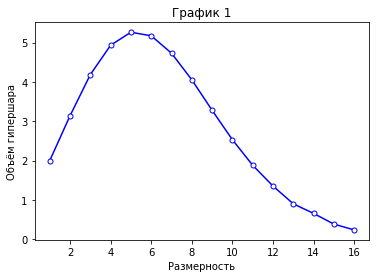

In [103]:
plt.plot(Rarray, volumes, color='b', marker='.', ms=10, mfc='w');
plt.title('График 1');
plt.xlabel('Размерность');
plt.ylabel('Объём гипершара');

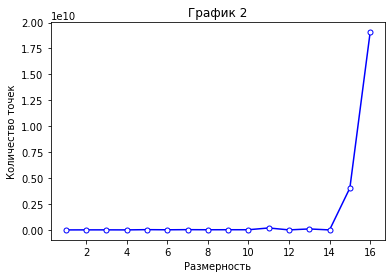

In [106]:
plt.plot(Rarray, number_of_dots, color='b', marker='.', ms=10, mfc='w');
plt.title('График 2');
plt.xlabel('Размерность');
plt.ylabel('Количество точек');

Разница между полученными результами и точными значениями:

In [19]:
for i in range(15):
    print(abs(volumes[i] - right_volumes[i]))

0.0
0.00010669614298475238
0.0025088254760472495
0.0018166005446778044
0.0017462232166538527
0.0037104757639818686
0.003574029668597767
0.006452003717381416
0.021763662096994985
0.021291312604617918
0.005196831165204863
0.016417231145410716
0.010724958388797612
0.05609547067920817
0.0021646978781595383


Для некоторых размерностей получилась достаточно большая разница между полученными результами и точными значениями (порядка 10^-2). При этом для этих же значений получено количество точек, которое заметно меньше ожидаемого. Для достижения меньшей ошибки в сравнении с точными значениями объёмов сделаю перерассчёт для некоторых значений.

Заметка: возможно, это необязательно, но просто хочется получить значения, наиболее приближённые к точным:)

Перерассчёт значений для размерностей 10, 12, 13, 14 и создание второго списка для хранения объёмов (volumes2), чтобы не потерять старые значения. Добавление новых значений в список volumes на соотвествующие места:

In [36]:
t = time.time()
dim10 = volume_MMK(10, eps_abs, eps_rel)
print(dim10)
print('Time for dimension', 10, ':', time.time() - t)

(2.54916432132964, 36100000)
Time for dimension 10 : 18.76112985610962


In [39]:
t = time.time()
dim12 = volume_MMK(12, eps_abs, eps_rel)
print(dim12)
print('Time for dimension', 12, ':', time.time() - t)

(1.3368201804005506, 654100000)
Time for dimension 12 : 349.4602565765381


In [40]:
t = time.time()
dim13 = volume_MMK(13, eps_abs, eps_rel)
print(dim13)
print('Time for dimension', 13, ':', time.time() - t)

(0.9126230238726785, 603200000)
Time for dimension 13 : 624.6467378139496


In [41]:
t = time.time()
dim14 = volume_MMK(14, eps_abs, eps_rel)
print(dim14)
print('Time for dimension', 14, ':', time.time() - t)

(0.6011611126203358, 3386600000)
Time for dimension 14 : 1848.2392020225525


In [88]:
volumes2 = []
for i in range(16):
    volumes2.append(volumes[i])
number_of_dots2 = []
for i in range(16):
    number_of_dots2.append(number_of_dots[i])

In [92]:
volumes2[9] = dim10[0]
volumes2[11] = dim12[0]
volumes2[12] = dim13[0]
volumes2[13] = dim14[0]

number_of_dots2[9] = dim10[1]
number_of_dots2[11] = dim12[1]
number_of_dots2[12] = dim13[1]
number_of_dots2[13] = dim14[1]

In [95]:
for i in range (16):
    print('Volume for dimension', i+1, '=', volumes2[i], ' Number of dots =', number_of_dots2[i])

Volume for dimension 1 = 2.0  Number of dots = 100000
Volume for dimension 2 = 3.1414859574468084  Number of dots = 4700000
Volume for dimension 3 = 4.186281379310343  Number of dots = 5800000
Volume for dimension 4 = 4.932985600000001  Number of dots = 2500000
Volume for dimension 5 = 5.26204279069767  Number of dots = 25800000
Volume for dimension 6 = 5.171423255813951  Number of dots = 12900000
Volume for dimension 7 = 4.728339999999998  Number of dots = 25600000
Volume for dimension 8 = 4.052260122699386  Number of dots = 16300000
Volume for dimension 9 = 3.276745240641711  Number of dots = 18700000
Volume for dimension 10 = 2.54916432132964  Number of dots = 36100000
Volume for dimension 11 = 1.8789070482246952  Number of dots = 188700000
Volume for dimension 12 = 1.3368201804005506  Number of dots = 654100000
Volume for dimension 13 = 0.9126230238726785  Number of dots = 603200000
Volume for dimension 14 = 0.6011611126203358  Number of dots = 3386600000
Volume for dimension 15 = 

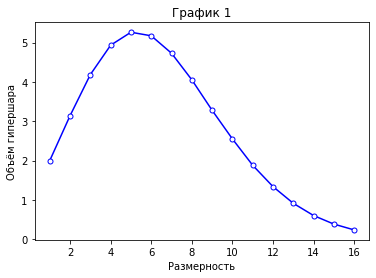

In [104]:
plt.plot(Rarray, volumes2, color='b', marker='.', ms=10, mfc='w');
plt.title('График 1');
plt.xlabel('Размерность');
plt.ylabel('Объём гипершара');

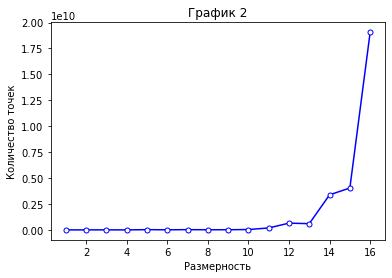

In [105]:
plt.plot(Rarray, number_of_dots2, color='b', marker='.', ms=10, mfc='w');
plt.title('График 2');
plt.xlabel('Размерность');
plt.ylabel('Количество точек');

Разница между полученными результами и точными значениями:

In [98]:
for i in range(15):
    print(abs(volumes2[i] - right_volumes[i]))

0.0
0.00010669614298475238
0.0025088254760472495
0.0018166005446778044
0.0017462232166538527
0.0037104757639818686
0.003574029668597767
0.006452003717381416
0.021763662096994985
0.0009997185477050863
0.005196831165204863
0.0015574115459613402
0.001994269089395484
0.001896583299543897
0.0021646978781595383


Удалось получить более точные значения объёмов гипершаров. Ура:)